In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers 
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import BatchNormalization, MaxPool2D
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
IMAGE_SIZE = 300    # image resolution
BATCH_SIZE = 16     # batch size
CHANNELS = 3        # R-G-B channel


# training dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/train",  
    shuffle = True,                                             
    image_size = (IMAGE_SIZE, IMAGE_SIZE),                      
    batch_size = BATCH_SIZE                                     
)

# validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/val",
    shuffle = False,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

# test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/test",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)


# class names denoted by the folder names
class_names = dataset.class_names
print(class_names)


# printing the size of the datasets
print(len(dataset))
print(len(val_dataset))
print(len(test_dataset))


# optimization purpose 
# caching 
# prefetching to simulataneously working of CPU and GPU
train_ds = dataset.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)


# resizing and rescaling images
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),                                         
    layers.experimental.preprocessing.Rescaling(1.0 / 255)                                         
])

Found 521 files belonging to 2 classes.
Found 64 files belonging to 2 classes.
Found 67 files belonging to 2 classes.
['AD', 'MCI']
33
4
5


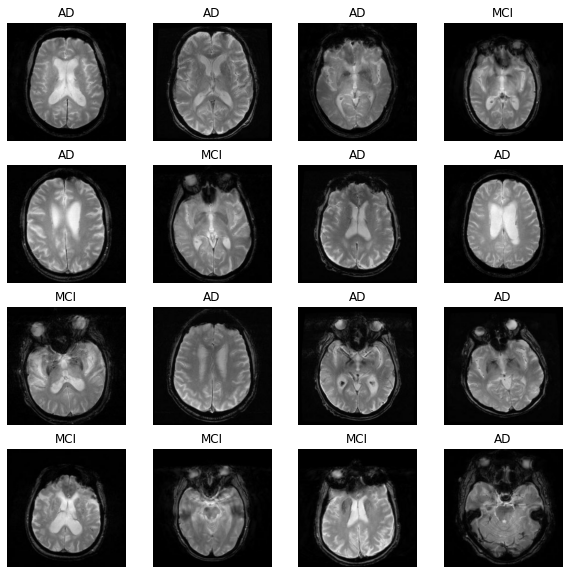

In [ ]:
# printing the images
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
# input shape with batch size, image size and channel
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# model 
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(2, padding='same'),          
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(2, padding='same'),    
    layers.Dropout(0.3),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPool2D(2, padding='same'),    
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])


# building the model
model.build(input_shape = input_shape)

In [ ]:
model.summary()
# plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 300, 300, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 300, 300, 32)        896       
                                                                 
 batch_normalization (BatchN  (16, 300, 300, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (16, 300, 300, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (16, 150, 150, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 150, 150, 32)       

In [ ]:
# compiling the model
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy']
)

In [ ]:
# defiging epochs
EPOCHS = 30


# recording the accuracy and loss data
history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
33/33 [==============================] - 52s 382ms/step - loss: 0.5660 - sparse_categorical_accuracy: 0.7140 - val_loss: 0.6668 - val_sparse_categorical_accuracy: 0.5781
Epoch 2/30
33/33 [==============================] - 3s 92ms/step - loss: 0.2692 - sparse_categorical_accuracy: 0.9117 - val_loss: 1.5118 - val_sparse_categorical_accuracy: 0.5781
Epoch 3/30
33/33 [==============================] - 3s 91ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9616 - val_loss: 2.5670 - val_sparse_categorical_accuracy: 0.5781
Epoch 4/30
33/33 [==============================] - 3s 92ms/step - loss: 0.0433 - sparse_categorical_accuracy: 0.9923 - val_loss: 4.5458 - val_sparse_categorical_accuracy: 0.5781
Epoch 5/30
33/33 [==============================] - 3s 91ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9693 - val_loss: 3.7564 - val_sparse_categorical_accuracy: 0.5781
Epoch 6/30
33/33 [==============================] - 3s 93ms/step - loss: 0.0649 - sparse_categorical_ac

In [ ]:
# evaluating the model with test data
scores = model.evaluate(test_ds)

5/5 [==============================] - 10s 49ms/step - loss: 0.5634 - sparse_categorical_accuracy: 0.9104


In [ ]:
scores

[0.563368022441864, 0.9104477763175964]

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

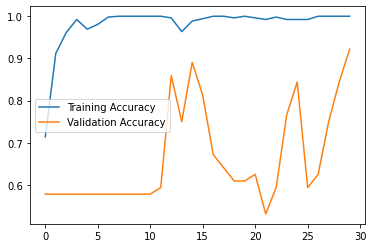

In [ ]:
plt.plot(range(EPOCHS), acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="Validation Accuracy")
plt.legend()
plt.show()

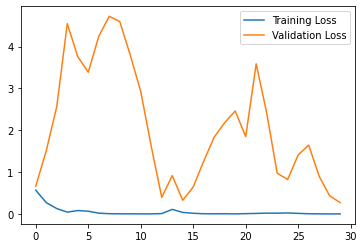

In [ ]:
plt.plot(range(EPOCHS), loss, label="Training Loss")
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# predict function which returns confidence and class label
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)                    # expanding dimensions of the image array
    predictions = model.predict(img_array)                      # prediction
    predicted_class = class_names[np.argmax(predictions[0])]    # predicted class of the image 
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


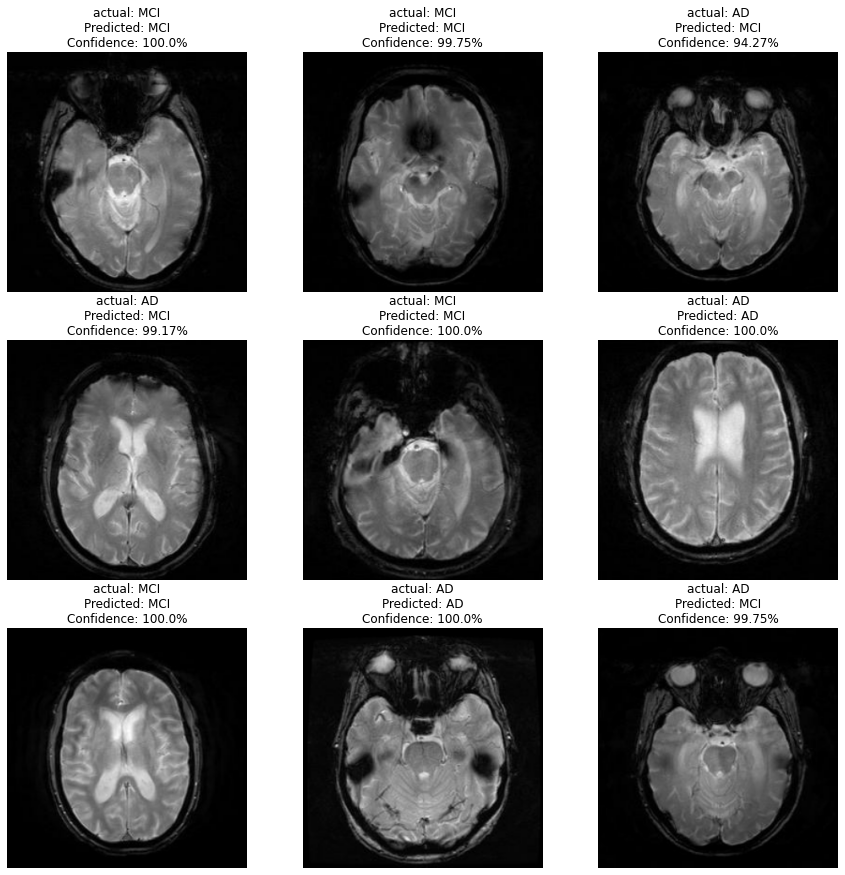

In [ ]:
# testing the model with the test images
plt.figure(figsize=(15, 15))

for image_batch, label_batch in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, image_batch[i]) 
        actual_class = class_names[label_batch[i]]
        plt.title(f"actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")

In [ ]:
# saving the model
model.save(f"models/my_model.h5")

In [ ]:
import cv2

class AlzeimerDetector:

    def __init__(self, path, model):
        self.path = path
        self.model = model

    def predict_from_cv(self):
        img = cv2.imread(self.path)
        img = cv2.resize(img, (300, 300), interpolation = cv2.INTER_NEAREST)
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(RGB_img)
        plt.axis("off")

        img_array = tf.expand_dims(RGB_img, 0) 

        predictions = self.model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions[0])]
        confidence = round(100 * (np.max(predictions[0])), 2)
        
        return f"There is a possibility of: '{predicted_class}' with confidence level: {confidence} %"

1/1 [==============================] - 0s 23ms/step


"There is a possibility of: 'MCI' with confidence level: 100.0 %"

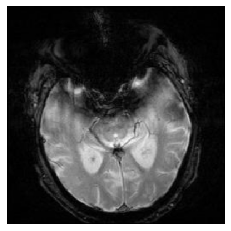

In [ ]:
path1 = '/content/drive/MyDrive/Test Images/ADNI_037_S_0566_MR_AXIAL_T2_STAR__br_raw_20130806083702743_19_S197302_I384387(MCI).jpg'

s = AlzeimerDetector(path1, model)
s.predict_from_cv()